# <b>PART 1: The Basics of Numpy Array</b>

## Numpy Array Attributes


In [107]:
import numpy as np
rng = np.random.default_rng(seed = 1701)

x1 = rng.integers(10, size=6) #one dimantional
x2 = rng.integers(10, size=(3,4)) #two dimantional
x3 = rng.integers(10, size=(3,4,5)) #three dimantional

In [108]:
print(f"x3 is {x3.ndim} dimantional array")
print(f"x3 shape = {x3.shape}")
print(f"x3 size = {x3.size}")
print(f"x3 dtype = {x3.dtype}")
print(f"\nx3: \n{x3}")

x3 is 3 dimantional array
x3 shape = (3, 4, 5)
x3 size = 60
x3 dtype = int64

x3: 
[[[4 3 5 5 0]
  [8 3 5 2 2]
  [1 8 8 5 3]
  [0 0 8 5 8]]

 [[5 1 6 2 3]
  [1 2 5 6 2]
  [5 2 7 9 3]
  [5 6 0 2 0]]

 [[2 9 4 3 9]
  [9 2 2 4 0]
  [0 3 0 0 2]
  [3 2 7 4 7]]]


## Array Indexing: Accessing Single Elements

In [109]:
x1

array([9, 4, 0, 3, 8, 6])

In [110]:
x1[0]

9

In [111]:
x1[4]

8

In [112]:
x1[-2]

8

## Array Slicing: Accesing Subarrays
<b><i>x[start:stop:step]</i></b>

One dimantional Subarrays

In [113]:
x1

array([9, 4, 0, 3, 8, 6])

In [114]:
x1[:3] #first three elements

array([9, 4, 0])

In [115]:
x1[3:] #elements from index 3

array([3, 8, 6])

In [116]:
x1[1:4] # from index 1 to 3

array([4, 0, 3])

In [117]:
x1[::2] # every second element

array([9, 0, 8])

In [118]:
x1[::-1] # all elements, reveresed

array([6, 8, 3, 0, 4, 9])

In [119]:
x1[4::-2] # every second elements from index 4, reversed

array([8, 0, 9])

Multidimensional Subarrays

In [120]:
x2

array([[3, 1, 3, 7],
       [4, 0, 2, 3],
       [0, 0, 6, 9]])

In [121]:
x2[:2, :3] #first two rows and tree columns

array([[3, 1, 3],
       [4, 0, 2]])

In [122]:
x2[:3, ::2] # first 3 rows, every second column

array([[3, 3],
       [4, 2],
       [0, 6]])

In [123]:
x2[::-1, ::-1,] # all rows and columns, reveresed

array([[9, 6, 0, 0],
       [3, 2, 0, 4],
       [7, 3, 1, 3]])

In [124]:
x2[:, 0] # first column of x2

array([3, 4, 0])

In [125]:
x2[0,:] # first row of x2

array([3, 1, 3, 7])

In [126]:
x2[0] #same: first row of x2

array([3, 1, 3, 7])

<b> Subarrays as no-copy Views</b>
<br>Unlike Python list slices, NumPy array slices are returned as views rather than copies
of the array data. Consider our two-dimensional array from before:

In [127]:
print(x2)

[[3 1 3 7]
 [4 0 2 3]
 [0 0 6 9]]


Let's extracrt a 2x2 subarray from this:

In [128]:
x2_sub = x2[:2,:2]
print(x2_sub)

[[3 1]
 [4 0]]


Now if we modify this subarray, we'll see that the original array is changed! Observe:

In [129]:
x2_sub[0,0] = 99
x2_sub

array([[99,  1],
       [ 4,  0]])

In [130]:
print(x2)

[[99  1  3  7]
 [ 4  0  2  3]
 [ 0  0  6  9]]


<b>Creating Copies of Arrays</b>
<br>
Despite the features of array views, it's sometimes usefull to insted explicity copy the data within an or subarray. This easiest to do with the <b>copy</b> method:

In [131]:
x2_sub_copy = x2[:2, :2].copy()
x2_sub_copy

array([[99,  1],
       [ 4,  0]])

In [132]:
x2_sub_copy[0,0] = 42
print(x2_sub_copy)

[[42  1]
 [ 4  0]]


In [133]:
print(x2)

[[99  1  3  7]
 [ 4  0  2  3]
 [ 0  0  6  9]]


## Reshaping of Arrays

Another useful type of operation is <B>reshaping</B> of arrays, which can be done with the reshape method. For example if you want to put the numbers 1 though 9 in a 3x3 grid, you can do the following:

In [134]:
grid = np.arange(1,10).reshape(3,3)
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Note that for this to work, the size of the initial array must match the size of the reshaped array, and in most cases the reshape method will return a no-copy vew of the iniial array.<br>
A common reshaping operation is converting a one-dimenstional array into a two dimensional row of columns matrix:

In [135]:
x = np.array([1, 2, 3])
x.reshape(1,3) # row vector via reshape

array([[1, 2, 3]])

In [136]:
x.reshape((3,1)) # column vector via reshape

array([[1],
       [2],
       [3]])

A convenient shorthand for this to use <b>np.newaxis</b> in the slicing syntax:

In [137]:
x[np.newaxis: ] #row vector via newaxix

array([1, 2, 3])

In [138]:
x[:, np.newaxis] #column vector via newaxis

array([[1],
       [2],
       [3]])

## Array Concatenation and splitting
<br>
All of the preceding routines worked on single arrays. Numpy also provied tools to combine multiple arrays into one, and to conversely split a single array into multiple arrays

<b>Concatenation of Arrays</b>

Concatenation, or joining of two arrays in Numpy, is primairly accomplised using the routines <b> np.concatenate</b>, <b>np.vstack,</b>, and <b>np.hstack</b>. <b>np.concatenate</b> takes a tuple or list of arrays as its first argument, as you can see here:

In [139]:
x = np.array([1,2,3])
y = np.array([3,2,1])
np.concatenate([x,y])

array([1, 2, 3, 3, 2, 1])

you can also concatenate more than two arrays at once:

In [140]:
z = np.array([99, 99, 99])
print(np.concatenate([x,y,z]))

[ 1  2  3  3  2  1 99 99 99]


And it can be used for two dimensional arrays:

In [141]:
grid = np.array([[1,2,3],
                 [4,5,6]])

In [142]:
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [143]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis = 1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

For working with arrays of mixed dimations, it can be clearer to use the <b>np.vstack</b> (vertial stack) and <b>np.hstack</b> (horizontal stack) funcions:

In [144]:
# vertically stack the arrays
np.vstack([x,grid])

array([[1, 2, 3],
       [1, 2, 3],
       [4, 5, 6]])

In [145]:
# horizontally stack the arrays
y = np.array([[99],
             [99]])
np.hstack([grid,y])

array([[ 1,  2,  3, 99],
       [ 4,  5,  6, 99]])

Similarly, for higher-dimensional arrays, <b> np.dstack </b> will stack arrays along the third axis.

<b>Splitting of Arrays<b>

The opposite of concatenation is splitting, which is implemented by the funcions <b>np.split, bp.hsplit</b>, and <b> np.vsplit</b>. For each of these, we can pass a list of indices giving the split points:

In [146]:
x = [1,2,3,4,5,6,7,8,9]
x1, x2, x3 = np.split(x, [3,5]) # The array will first split before index '3' then split before index '5'
print(x1,x2,x3)

[1 2 3] [4 5] [6 7 8 9]


Notice that N split points leads to N+1 subarrays. The related functions np.hsplit and np.vsplitare similar:

In [147]:
grid = np.arange(16). reshape((4,4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [148]:
upper, lower = np.vsplit(grid, [2])
upper, lower

(array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11],
        [12, 13, 14, 15]]))

In [149]:
left, right = np.hsplit(grid, [2])
left, right

(array([[ 0,  1],
        [ 4,  5],
        [ 8,  9],
        [12, 13]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11],
        [14, 15]]))

# <b>PART 2: Computation on Numpy Arrays: Universal Funcions

## The Slowness of Loops

Python’s default implementation (known as CPython) does some operations very
slowly. This is partly due to the dynamic, interpreted nature of the language; types are
flexible, so sequences of operations cannot be compiled down to efficient machine
code as in languages like C and Fortran. Recently there have been various attempts to
address this weakness: well-known examples are the <b>PyPy project</b>, a just-in-time
compiled implementation of Python; the <b>Cython project</b>, which converts Python
code to compilable C code; and the <b>Numba project</b>, which converts snippets of
Python code to fast LLVM bytecode. Each of these has its strengths and weaknesses,
but it is safe to say that none of the three approaches has yet surpassed the reach and
popularity of the standard CPython engine.
<br>The relative sluggishness of Python generally manifests itself in situations where
many small operations are being repeated; for instance, looping over arrays to operate
on each element. For example, imagine we have an array of values and we’d like to
compute the reciprocal of each. A straightforward approach might look like this:

In [150]:
import numpy as np
rng = np.random.default_rng(seed = 1701)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

values = rng.integers(1,10,size=5)
compute_reciprocals(values)

array([0.11111111, 0.25      , 1.        , 0.33333333, 0.125     ])

This implementation probably feels fairly natural to someone from, say, a C or Java
background. But if we measure the execution time of this code for a large input, we
see that this operation is very slow—perhaps surprisingly so! We’ll benchmark this
with IPython’s %timeit magic

In [151]:
big_array = rng.integers(1, 100, size = 1000000)
%timeit compute_reciprocals(big_array)

713 ms ± 6.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It takes several seconds to compute these million operations and to store the result!
When even cell phones have processing speeds measured in gigaflops (i.e., billions of
numerical operations per second), this seems almost absurdly slow. It turns out that
the bottleneck here is not the operations themselves, but the type checking and function
dispatches that CPython must do at each cycle of the loop. Each time the reciprocal
is computed, Python first examines the object’s type and does a dynamic lookup of
the correct function to use for that type. If we were working in compiled code instead,
this type specification would be known before the code executed and the result could
be computed much more efficiently.

## Introsucting Ufuncs

For many types of operations, NumPy provides a convenient interface into just this
kind of statically typed, compiled routine. This is known as a vectorized operation.
For simple operations like the element-wise division here, vectorization is as simple
as using Python arithmetic operators directly on the array object. This vectorized
approach is designed to push the

Compare the results of the following two operations:

In [152]:
print(compute_reciprocals(values))
print(1.0/values)

[0.11111111 0.25       1.         0.33333333 0.125     ]
[0.11111111 0.25       1.         0.33333333 0.125     ]


In [153]:
%timeit (1.0/big_array)

716 μs ± 41.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Vectorized operations in Numpy are implemented via ufuncs, wholse main purpose is to quickly execute repeated operations between a scalar and an array, but we can also operate between two arrays:

In [154]:
np.arange(5)/ np.arange(1,6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

And ufunc operations are not limited to one-dimantional arrays. The can act on multidimentional arrays as well:

In [155]:
x = np.arange(9).reshape((3,3))
2**x # 2 ^ x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

## Exploring NumPy's Ufuncs

Ufuncs exist in two flavors: unary ufuncs, which operate on single input, and binary ufuncs, which operate on two inputs, We'll see examples of both these types of fuchtions here:

<b> Array Arithmetic

In [156]:
x = np.arange(4)
print(f"x = {x}")
print(f"x+5 = {x+5}")
print(f"x-5 = {x-5}")
print(f"x*5 = {x*5}")
print(f"x/2 = {x/2}")
print(f"x//2 = {x//2}") # floor division

x = [0 1 2 3]
x+5 = [5 6 7 8]
x-5 = [-5 -4 -3 -2]
x*5 = [ 0  5 10 15]
x/2 = [0.  0.5 1.  1.5]
x//2 = [0 0 1 1]


In [157]:
print(f"-x = {-x}")
print(f"x**2 = {x**2}")
print(f"x%2 = {x%2}")

-x = [ 0 -1 -2 -3]
x**2 = [0 1 4 9]
x%2 = [0 1 0 1]


These can be strung together howerver you wish, and the standard order of operations is respeted: 

In [158]:
-(0.5 * x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

All of these arithmetic operations are simply convenient wrappers around specific ufuncs build into NumPy, For example the + operator is wrapeper for the add unfuc:

In [159]:
np.add(x,2)

array([2, 3, 4, 5])

<table border="1" cellpadding="8" cellspacing="0">
  <caption><strong>Table: Arithmetic operators implemented in NumPy</strong></caption>
  <thead>
    <tr>
      <th>Operator</th>
      <th>Equivalent ufunc</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>+</td>
      <td><code>np.add</code></td>
      <td>Addition (e.g., 1 + 1 = 2)</td>
    </tr>
    <tr>
      <td>-</td>
      <td><code>np.subtract</code></td>
      <td>Subtraction (e.g., 3 - 2 = 1)</td>
    </tr>
    <tr>
      <td>-</td>
      <td><code>np.negative</code></td>
      <td>Unary negation (e.g., -2)</td>
    </tr>
    <tr>
      <td>*</td>
      <td><code>np.multiply</code></td>
      <td>Multiplication (e.g., 2 * 3 = 6)</td>
    </tr>
    <tr>
      <td>/</td>
      <td><code>np.divide</code></td>
      <td>Division (e.g., 3 / 2 = 1.5)</td>
    </tr>
    <tr>
      <td>//</td>
      <td><code>np.floor_divide</code></td>
      <td>Floor division (e.g., 3 // 2 = 1)</td>
    </tr>
    <tr>
      <td>**</td>
      <td><code>np.power</code></td>
      <td>Exponentiation (e.g., 2 ** 3 = 8)</td>
    </tr>
    <tr>
      <td>%</td>
      <td><code>np.mod</code></td>
      <td>Modulus/remainder (e.g., 9 % 4 = 1)</td>
    </tr>
  </tbody>
</table>


<B>Abusolute Value

In [160]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

In [161]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [162]:
np.abs(x)

array([2, 1, 0, 1, 2])

Aslto can handle complex data, but only returns the magnitude:

In [163]:
x = np.array([3-4j, 4-3j, 2+0j, 0+1j])
np.abs(x)

array([5., 5., 2., 1.])

<b> Trigonometric Functions

In [164]:
#linpace(start:end:n) gives n number of evenly divided value from start to end
theta =  np.linspace(0, np.pi, 3)
theta

array([0.        , 1.57079633, 3.14159265])

In [165]:
theta

array([0.        , 1.57079633, 3.14159265])

In [166]:
print(np.sin(theta))
print(np.cos(theta))
print(np.tan(theta))

[0.0000000e+00 1.0000000e+00 1.2246468e-16]
[ 1.000000e+00  6.123234e-17 -1.000000e+00]
[ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [167]:
x = [-1, 0, 1]
print(x)
print(np.arcsin(x))
print(np.arccos(x))
print(np.arctan(x))

[-1, 0, 1]
[-1.57079633  0.          1.57079633]
[3.14159265 1.57079633 0.        ]
[-0.78539816  0.          0.78539816]


<B>Exponets and logarithms

In [168]:
x = [1,2,3]
x, np.exp(x), np.exp2(x), np.power(3., x) # x, e^x, 2^x, 3^x

([1, 2, 3],
 array([ 2.71828183,  7.3890561 , 20.08553692]),
 array([2., 4., 8.]),
 array([ 3.,  9., 27.]))

In [169]:
x = [1,2,3,4,10]
x, np.log(x), np.log2(x), np.log10(x) # x, ln(x), ....

([1, 2, 3, 4, 10],
 array([0.        , 0.69314718, 1.09861229, 1.38629436, 2.30258509]),
 array([0.        , 1.        , 1.5849625 , 2.        , 3.32192809]),
 array([0.        , 0.30103   , 0.47712125, 0.60205999, 1.        ]))

In [170]:
x = [0, 0.001, 0.01, 0.1]
print(np.expm1(x)) # exp(x) -1
print(np.log1p(x)) # log(1+x)
# gives more precise values than raw np.log or np.exp

[0.         0.0010005  0.01005017 0.10517092]
[0.         0.0009995  0.00995033 0.09531018]


<b> Specialized Ufuncs

In [171]:
from scipy import special as sp

In [172]:
# Gamma functions (generalized factorials) and related functions
x = [1,5,10]
sp.gamma(x), sp.gammaln(x), sp.beta(x,2)


(array([1.0000e+00, 2.4000e+01, 3.6288e+05]),
 array([ 0.        ,  3.17805383, 12.80182748]),
 array([0.5       , 0.03333333, 0.00909091]))

In [173]:
# Error FUnction (integral of Gaussion),
#its complement, and its inverse
x = np.linspace(0, 1, 4)
x, sp.erf(x), sp.erfc(x), sp.erfinv(x)

(array([0.        , 0.33333333, 0.66666667, 1.        ]),
 array([0.        , 0.36264811, 0.65422141, 0.84270079]),
 array([1.        , 0.63735189, 0.34577859, 0.15729921]),
 array([0.        , 0.30457019, 0.68407035,        inf]))

## Advanced Ufunc Features

Many NumPy users make use of ufuncs without ever learing their full set of features.
<br>
<b> Not Me

<b> Specifying Output

For large calculating it is sometimes useful to be able to specify the array where the result of the calcuoation will be stored. For all ufuncs, this can be done using the out argument of the function:

In [174]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
y

array([ 0., 10., 20., 30., 40.])

In [175]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
y

array([ 1.,  0.,  2.,  0.,  4.,  0.,  8.,  0., 16.,  0.])

If we had insted written <B> y[::2] = 2**x</b>, this would have the resulted in the creating of a temporary array to hold the reluts of 2 ** x, followed by a second operation copying those values into the y arrays. Thos doesn't make much of a difference for such a small computation, but for very large arrays the memory savings from careful use of the out arguments can be significant.

<b>Aggregations

Calling <b>reduce</b> on the add ufunc returns the sum of all elements in the array:

In [176]:
x = np.arange(1,6)
print(x)
print(np.add.reduce(x))

[1 2 3 4 5]
15


In [177]:
np.multiply.reduce(x)

120

If we'd like to store all the intermediate results of the computations, we can instead use accumulate:

In [178]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [179]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

<b>Note:</b> For these particular calses, here are dedicated Numpy funcions to compute the resluts (np.sum, np.prod, np.cumsum, np.cumprod), which we'll se letter

<B>Outer Products

In [180]:
x = np.arange(1,6)
print(x)
np.multiply.outer(x,x)

[1 2 3 4 5]


array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

In [181]:
y = np.arange(1,6).reshape(5,1)
print(np.multiply.outer(y,x))

[[[ 1  2  3  4  5]]

 [[ 2  4  6  8 10]]

 [[ 3  6  9 12 15]]

 [[ 4  8 12 16 20]]

 [[ 5 10 15 20 25]]]


# <b> PART 3: Aggregations: min, max and Everything in Bettween

## Summing the Values in an Array

In [182]:
import numpy as np
rng = np.random.default_rng()

In [183]:
L = rng.random(100)
sum(L)

47.14495100698757

The syntex is quite similar to that of NumPy's sum funciton, and the reult is the same in the simplest case:

In [184]:
np.sum(L)

47.14495100698757

Howerver, because it executes the operation in compiled code, NumPy's version of the operation is computed much more queickly:

In [185]:
big_array = rng.random(100000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

4.15 s ± 75.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
17.7 ms ± 144 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Be careful, though: the sum function and the np.sum function are not identical, which
can sometimes lead to confusion! In particular, their optional arguments have different
meanings (sum(x, 1) initializes the sum at 1, while np.sum(x, 1) sums along
axis 1), and np.sum is aware of multiple array dimensions, as we will see in the following
section.

## Minimum and Maximum

In [186]:
#python build-in
min(big_array), max(big_array)

(1.1195613547343441e-08, 0.9999999971461928)

In [187]:
# NumPy build-in
np.min(big_array), np.max(big_array)

(1.1195613547343441e-08, 0.9999999971461928)

For min, max, sum and several other Numpy aggregates, a shorted syntex is to use method of the array object itself:

In [188]:
big_array.min(), big_array.max()

(1.1195613547343441e-08, 0.9999999971461928)

## Multidimenstional Aggregates

In [189]:
M = rng.integers(0, 10, (3,4))
print(M)

[[4 4 1 6]
 [4 1 7 3]
 [3 9 3 7]]


In [190]:
M.sum()

52

In [191]:
M.min(axis = 0)

array([3, 1, 1, 3])

In [192]:
M.max(axis = 1)

array([6, 7, 9])

<table border="1" cellpadding="8" cellspacing="0">
  <caption><strong>Table: Aggregation functions available in NumPy</strong></caption>
  <thead>
    <tr>
      <th>Function name</th>
      <th>NaN-safe version</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>np.sum</code></td>
      <td><code>np.nansum</code></td>
      <td>Compute sum of elements</td>
    </tr>
    <tr>
      <td><code>np.prod</code></td>
      <td><code>np.nanprod</code></td>
      <td>Compute product of elements</td>
    </tr>
    <tr>
      <td><code>np.mean</code></td>
      <td><code>np.nanmean</code></td>
      <td>Compute mean of elements</td>
    </tr>
    <tr>
      <td><code>np.std</code></td>
      <td><code>np.nanstd</code></td>
      <td>Compute standard deviation</td>
    </tr>
    <tr>
      <td><code>np.var</code></td>
      <td><code>np.nanvar</code></td>
      <td>Compute variance</td>
    </tr>
    <tr>
      <td><code>np.min</code></td>
      <td><code>np.nanmin</code></td>
      <td>Find minimum value</td>
    </tr>
    <tr>
      <td><code>np.max</code></td>
      <td><code>np.nanmax</code></td>
      <td>Find maximum value</td>
    </tr>
    <tr>
      <td><code>np.argmin</code></td>
      <td><code>np.nanargmin</code></td>
      <td>Find index of minimum value</td>
    </tr>
    <tr>
      <td><code>np.argmax</code></td>
      <td><code>np.nanargmax</code></td>
      <td>Find index of maximum value</td>
    </tr>
    <tr>
      <td><code>np.median</code></td>
      <td><code>np.nanmedian</code></td>
      <td>Compute median of elements</td>
    </tr>
    <tr>
      <td><code>np.percentile</code></td>
      <td><code>np.nanpercentile</code></td>
      <td>Compute rank-based statistics of elements</td>
    </tr>
    <tr>
      <td><code>np.any</code></td>
      <td>N/A</td>
      <td>Evaluate whether any elements are true</td>
    </tr>
    <tr>
      <td><code>np.all</code></td>
      <td>N/A</td>
      <td>Evaluate whether all elements are true</td>
    </tr>
  </tbody>
</table>


## Example: What is the Avarage height of US Presidents?

Aggregates available in numpy can act as summury statistics for a set fo values. As a small example, lets's consider the heights of all US presidents. Thes data is available in the file president_health.csv

In [193]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/US-presidents-heights/refs/heads/master/president_heights.csv")
data.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [194]:
height = np.array(data['height(cm)'])
print(height)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [195]:
height.mean(), height.std(), height.min(), height.max()

(179.73809523809524, 6.931843442745892, 163, 193)

In [196]:
print(np.percentile(height, 25),
np.median(height),
np.percentile(height, 75))

174.25 182.0 183.0


In [197]:
import matplotlib.pyplot as plt
# plt.style.use('seaborn-v0_8-whitegrid')
plt.style.use('default')

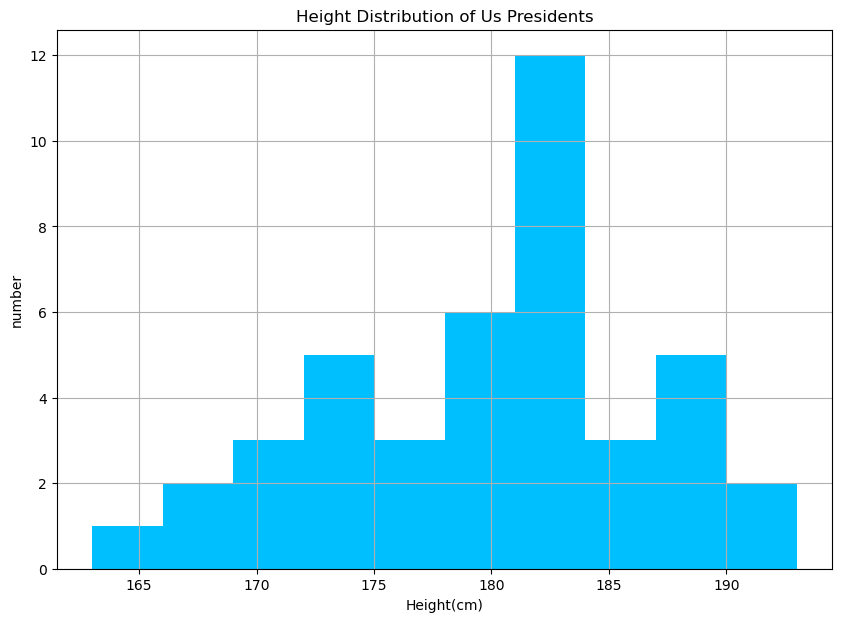

In [198]:
plt.figure(figsize=(10,7))
plt.hist(height, color = "#00BFFF") # this color is called capri haha
plt.title('Height Distribution of Us Presidents')
plt.xlabel('Height(cm)')
plt.ylabel('number')
plt.grid()
plt.show()

# <B> PART 4: Computation on Arrays:

## Introducing Broadcasting

In [199]:
import numpy as np

In [200]:
a = np.array([0,1,2])
b = np.array([5,5,5])
a + b

array([5, 6, 7])

In [201]:
a + b

array([5, 6, 7])

In [202]:
M = np.ones((3,3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [203]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [204]:
a = np.arange(3)
b =  np.arange(3)[:, np.newaxis]
a, b

(array([0, 1, 2]),
 array([[0],
        [1],
        [2]]))

In [205]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>NumPy Broadcasting</title>
  <style>
    body {
      font-family: Arial, sans-serif;
    }
    table {
      border-collapse: collapse;
      margin: 20px 0;
    }
    td {
      border: 1px solid #999;
      padding: 8px;
      text-align: center;
      background-color: #d9edf7;
    }
    .equation {
      font-family: monospace;
      margin: 10px 0;
    }
    .section {
      margin-bottom: 30px;
    }
    .caption {
      font-style: italic;
      font-size: 14px;
      margin-top: 10px;
    }
  </style>
</head>
<body>

  <h2>NumPy Broadcasting Examples</h2>

  <div class="section">
    <div class="equation">np.arange(3) + 5</div>
    <table>
      <tr>
        <td>0</td><td>1</td><td>2</td>
      </tr>
      <tr>
        <td>+</td><td>+</td><td>+</td>
      </tr>
      <tr>
        <td>5</td><td>5</td><td>5</td>
      </tr>
      <tr>
        <td>=</td><td>=</td><td>=</td>
      </tr>
      <tr>
        <td>5</td><td>6</td><td>7</td>
      </tr>
    </table>
  </div>

  <div class="section">
    <div class="equation">np.ones((3,3)) + np.arange(3)</div>
    <table>
      <tr>
        <td>1</td><td>1</td><td>1</td>
        <td rowspan="3" style="border: none;">+</td>
        <td>0</td><td>1</td><td>2</td>
        <td rowspan="3" style="border: none;">=</td>
        <td>1</td><td>2</td><td>3</td>
      </tr>
      <tr>
        <td>1</td><td>1</td><td>1</td>
        <td>0</td><td>1</td><td>2</td>
        <td>1</td><td>2</td><td>3</td>
      </tr>
      <tr>
        <td>1</td><td>1</td><td>1</td>
        <td>0</td><td>1</td><td>2</td>
        <td>1</td><td>2</td><td>3</td>
      </tr>
    </table>
  </div>

  <div class="section">
    <div class="equation">np.arange(3).reshape((3,1)) + np.arange(3)</div>
    <table>
      <tr>
        <td>0</td>
        <td rowspan="3" style="border: none;">+</td>
        <td>0</td><td>1</td><td>2</td>
        <td rowspan="3" style="border: none;">=</td>
        <td>0</td><td>1</td><td>2</td>
      </tr>
      <tr>
        <td>1</td>
        <td>0</td><td>1</td><td>2</td>
        <td>1</td><td>2</td><td>3</td>
      </tr>
      <tr>
        <td>2</td>
        <td>0</td><td>1</td><td>2</td>
        <td>2</td><td>3</td><td>4</td>
      </tr>
    </table>
  </div>

  <div class="caption">
    Figure: Visualization of NumPy broadcasting (adapted from a source published in the <a href="http://www.astroml.org" target="_blank">astroML documentation</a> and used with permission)
  </div>

</body>
</html>


## Rules of Broadcasting

<p>Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:</p>

<div>
  <p style="font-family: 'Times New Roman', serif; font-style: italic;">Rule 1</p>
  <pre style="margin-left: 2em;">
If the two arrays differ in their number of dimensions, 
the shape of the one with the fewer dimensions is padded 
with ones on its leading (left) side.
  </pre>
  <p style="font-family: 'Times New Roman', serif; font-style: italic;">Rule 2</p>
  <pre style="margin-left: 2em;">
If the shape of the two arrays does not match in any dimansion, 
the array with shape equal to 1 in that dimension is stretched 
to match other spahe.
  </pre>
  <p style="font-family: 'Time New Roman', serif; font-style: italic;"> Rule 3</p>
  <pre style="margin-left: 2em;">
If in any dimension the sizes disagree and neither is equal to 1, 
an error is raised.
  </pre>
</div>

<b> Broadcasting Example 1</b>

In [206]:
#Suppose we want to add two-dim array to one-dim array:
M = np.array([[1,3,4],
              [2, 5, 6]])
a = np.arange(3)

<div style="font-family: Georgia, serif; line-height: 1.7; font-size: 16px;">

  <p>
    Let’s consider an operation on these two arrays, which have the following shapes:
  </p>

  <ul>
    <li><code>M.shape</code> is <code>(2, 3)</code></li>
    <li><code>a.shape</code> is <code>(3,)</code></li>
  </ul>

  <p>
    We see by rule 1 that the array <code>a</code> has fewer dimensions, so we pad it on the left with ones:
  </p>

  <ul>
    <li><code>M.shape</code> remains <code>(2, 3)</code></li>
    <li><code>a.shape</code> becomes <code>(1, 3)</code></li>
  </ul>

  <p>
    By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:
  </p>

  <ul>
    <li><code>M.shape</code> remains <code>(2, 3)</code></li>
    <li><code>a.shape</code> becomes <code>(2, 3)</code></li>
  </ul>

  <p>
    The shapes now match, and we see that the final shape will be <code>(2, 3)</code>:
  </p>

</div>


In [207]:
M + a

array([[1, 4, 6],
       [2, 6, 8]])

<b> Broadcasting Example 2

In [208]:
a = np.arange(3).reshape((3,1))
b = np.arange(3)
a, b

(array([[0],
        [1],
        [2]]),
 array([0, 1, 2]))

<div style="font-family: Georgia, serif; line-height: 1.7; font-size: 16px;">

  <p>
    Again, we’ll start by determining the shapes of the arrays:
  </p>

  <ul>
    <li><code>a.shape</code> is <code>(3, 1)</code></li>
    <li><code>b.shape</code> is <code>(3,)</code></li>
  </ul>

  <p>
    Rule 1 says we must pad the shape of <code>b</code> with ones:
  </p>

  <ul>
    <li><code>a.shape</code> remains <code>(3, 1)</code></li>
    <li><code>b.shape</code> becomes <code>(1, 3)</code></li>
  </ul>

  <p>
    And rule 2 tells us that we must upgrade each of these 1s to match the corresponding size of the other array:
  </p>

  <ul>
    <li><code>a.shape</code> becomes <code>(3, 3)</code></li>
    <li><code>b.shape</code> becomes <code>(3, 3)</code></li>
  </ul>

  <p>
    Because the results match, these shapes are compatible. We can see this here:
  </p>

</div>


In [209]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

<b> Broadcasting Example 3

In [210]:
M = np.ones((3,2))
a = np.arange(3)
M.shape, a.shape

((3, 2), (3,))

<div style="font-family: Georgia, serif; line-height: 1.7; font-size: 16px;">

  <p>
    This is just a slightly different situation than in the first example: the matrix <code>M</code> is transposed.
    How does this affect the calculation? The shapes of the arrays are as follows:
  </p>

  <ul>
    <li><code>M.shape</code> is <code>(3, 2)</code></li>
    <li><code>a.shape</code> is <code>(3,)</code></li>
  </ul>

  <p>
    Again, rule 1 tells us that we must pad the shape of <code>a</code> with ones:
  </p>

  <ul>
    <li><code>M.shape</code> remains <code>(3, 2)</code></li>
    <li><code>a.shape</code> becomes <code>(1, 3)</code></li>
  </ul>

  <p>
    By rule 2, the first dimension of <code>a</code> is then stretched to match that of <code>M</code>:
  </p>

  <ul>
    <li><code>M.shape</code> remains <code>(3, 2)</code></li>
    <li><code>a.shape</code> becomes <code>(3, 3)</code></li>
  </ul>

  <p>
    Now we hit <strong>rule 3</strong>—the final shapes do not match, so these two arrays are
    <strong>incompatible</strong>, as we can observe by attempting this operation:
  </p>

</div>


In [211]:
M+a # will gives an error

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

# <b> PART 5: Comparisons, Masks, and Boolean Logic

## Example: Counting Rainy Days

In [ ]:
!pip install vega_datasets

In [ ]:
import numpy as np
from vega_datasets import data

In [ ]:
# Use DataFrame operations to extract rainfall as Numpy array
rainfall_mm = np.array(
    data.seattle_weather().set_index('date')['precipitation']['2015']
)
len(rainfall_mm)

365

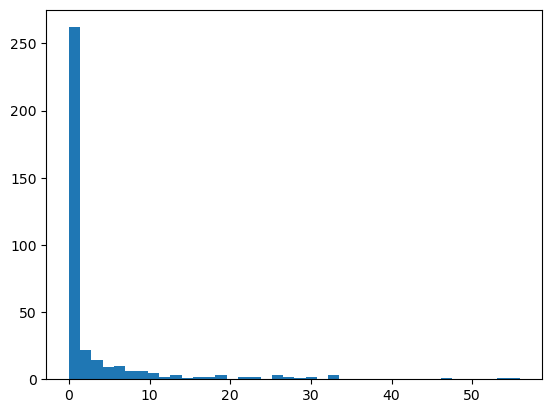

In [ ]:
import matplotlib.pyplot as plt
plt.hist(rainfall_mm, 40)
plt.show()

## Comparison Operators as Ufuncs

In [ ]:
x = np.array([1,2,3,4,5])
print(x<3)
print(x>3)
print(x<=3)
print(x>=3)
print(x!=3)
print(x==3)

[ True  True False False False]
[False False False  True  True]
[ True  True  True False False]
[False False  True  True  True]
[ True  True False  True  True]
[False False  True False False]


In [ ]:
(2*x) == (x**2)

array([False,  True, False, False, False])

## Working with Boolean Arrays

In [ ]:
rng = np.random.default_rng(seed = 1701)
x = rng.integers(10, size=(3,4))
x

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]])

<b>Counting Endtries

In [ ]:
# How many values less than 6
np.count_nonzero(x<6)

8

In [ ]:
# Another way to get this information
np.sum(x<6)

8

In [ ]:
# How manyu values less than 6 in eatch row?
np.sum(x<6, axis = 1)

array([3, 2, 3])

If we're interested in quickly checking whether any or all the values are Ture, we can use <b> np.any</b> or <b> np.all:

In [ ]:
np.any(x>8)

True

In [ ]:
np.any(x<0)

False

In [ ]:
np.all(x<10)

True

In [ ]:
np.all(x==6)

False

In [ ]:
np.all(x<8, axis = 1)

array([False, False,  True])

<b> Boolean Operations

In [ ]:
np.sum((rainfall_mm > 10) & (rainfall_mm < 20))

16

In [ ]:
np.sum(~((rainfall_mm <= 10) | (rainfall_mm >= 20)))

16

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; font-family: monospace; text-align: left;">
  <thead style="background-color: black; color: white;">
    <tr>
      <th>Operator</th>
      <th>Equivalent ufunc</th>
      <th>Operator</th>
      <th>Equivalent ufunc</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>&amp;</td>
      <td>np.bitwise_and</td>
      <td>|</td>
      <td>np.bitwise_or</td>
    </tr>
    <tr>
      <td>^</td>
      <td>np.bitwise_xor</td>
      <td>~</td>
      <td>np.bitwise_not</td>
    </tr>
  </tbody>
</table>


In [ ]:
print("Number days without rain: ", np.sum(rainfall_mm == 0))
print("Number days with rain: ", np.sum(rainfall_mm != 0))
print("Days with more than 10 mm: ", np.sum(rainfall_mm > 10))
print("Rainy days with < 5 mm: ", np.sum((rainfall_mm > 0) & (rainfall_mm < 5)))

Number days without rain:  221
Number days with rain:  144
Days with more than 10 mm:  34
Rainy days with < 5 mm:  83


## Boolean Arrays as Masks

In [ ]:
x

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]])

In [ ]:
x<5

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

Now to select these values from the array, we can simply index on this Boolean array; this is known as <i><b>masking</b></i> operation:

In [ ]:
x[x<5]

array([4, 0, 3, 3, 1, 3, 4, 0])

## Using the keybwords and/or Verus the Operators &/|

In [ ]:
bool(42), bool(0)

(True, False)

In [ ]:
bool(42 and 0)

False

In [ ]:
bool(42 or 0)

True

When we use & and | on integets, the expression operates on the bitwise representation of the element, applying the <b>and</b> or the <b>or</b> to the individual bits making up the number:

In [ ]:
bin(42), bin(59)

('0b101010', '0b111011')

In [ ]:
bin(42 & 59)

'0b101010'

In [ ]:
bin(42|59)

'0b111011'

In [ ]:
A = np.array([1,0,1,0,1,0], dtype=bool)
B = np.array([1,1,1,0,1,1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

But if yo uuse <b>or</b> on these arrays it will try to evaluate the truth or falsehood of the entire array object, which is not a well-defined value:

In [ ]:
A or B # Waring: Shows error

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [214]:
x = np.arange(10)
(x>4) & (x<8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [215]:
(x>4) and (x<8) # warning genarate error

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# <B> PART 6: Fancy Indexing

## Exploring Fancy Indexing

In [216]:
import numpy as np
rng = np.random.default_rng(seed = 1701)

x = rng.integers(100, size=10)
print(x)

[90 40  9 30 80 67 39 15 33 79]


In [217]:
[x[3], x[7], x[7]]

[30, 15, 15]

In [218]:
ind = [3,7,4]
x[ind]

array([30, 15, 80])

When using arrays of indices, the shape of the result reflects the shape of the indes arrays rather than the sape of the array being indexed:

In [219]:
ind = np.array([[3,7],
                [4,5]])
x[ind]

array([[30, 15],
       [80, 67]])

Fancy indexcing also works in multiple dimensionis.

In [220]:
x = np.arange(12).reshape((3,4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [221]:
row = np.array([0,1,2])
col = np.array([2,1,3])
x[row, col]

array([ 2,  5, 11])

The pairing of indices in fancy indexing follows all the broadcasting rules. So, for example, if we combine a column vector and a row vector within the indices, we get a two-dimensional reslult:

In [222]:
x[row[:,np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

## Combined Indexing

For even more powerful operation, fancy indexing can be combined with the other indexing schemes we've seen. For example, given the array x:

In [223]:
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


we can combine fancy and simple indices:

In [224]:
x[2, [2,0,1]]

array([10,  8,  9])

In [225]:
x[1:, [2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [226]:
mask = np.array([True,False, True, False])
x[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## Example: Selecting Random Points

One common use of fancy indexing is the selection of subsets of rows from a matrix. For example, we might have an N x D matrix representing N points in D dimensions, such as the following points drawn from a two- dimensional normal distribution:

In [227]:
mean = 0
var = 1
x = rng.normal(mean, var, 100) #this is x is like z-score
print(x.shape)
x

(100,)


array([-1.62453268,  1.50806312, -1.22449846,  1.22696072, -1.05013046,
        0.62509363,  0.09693023,  0.62776415, -0.28565182,  1.49678665,
       -0.76768541, -0.3942867 , -1.35693505,  0.33524959,  0.57442768,
        1.62016911,  0.33395176, -1.02906713, -0.94266623,  0.38365532,
        0.25423793,  1.36108696,  1.25474959, -0.05637126,  0.44880896,
       -1.47909513,  2.40254455, -0.06959272, -1.52752832,  1.93633419,
       -1.28006351, -0.71562065,  0.72455605,  0.47362789, -0.33131697,
        0.26272942,  1.75038031,  0.01834221, -1.43899931,  1.3716487 ,
        0.67679557,  0.53793618,  1.53399445,  0.28214872,  0.56313954,
       -0.37793941, -1.15832253,  0.96594187, -0.35611958, -1.28536874,
        0.19742658,  0.41682623, -0.95386364,  0.75830441, -2.08596882,
       -1.16203473,  0.34232684, -1.11888193, -1.13596   ,  0.6742499 ,
        1.26767704,  0.65873509, -0.64003051,  3.09160717,  0.51595829,
        0.61122253, -0.01723733,  0.3037547 ,  0.48345155,  1.31

In [228]:
#another way to get random value to use random
z = np.random.normal(mean, var, 20) 
print(x)
print()
print(x.mean()) #sample mean

[-1.62453268  1.50806312 -1.22449846  1.22696072 -1.05013046  0.62509363
  0.09693023  0.62776415 -0.28565182  1.49678665 -0.76768541 -0.3942867
 -1.35693505  0.33524959  0.57442768  1.62016911  0.33395176 -1.02906713
 -0.94266623  0.38365532  0.25423793  1.36108696  1.25474959 -0.05637126
  0.44880896 -1.47909513  2.40254455 -0.06959272 -1.52752832  1.93633419
 -1.28006351 -0.71562065  0.72455605  0.47362789 -0.33131697  0.26272942
  1.75038031  0.01834221 -1.43899931  1.3716487   0.67679557  0.53793618
  1.53399445  0.28214872  0.56313954 -0.37793941 -1.15832253  0.96594187
 -0.35611958 -1.28536874  0.19742658  0.41682623 -0.95386364  0.75830441
 -2.08596882 -1.16203473  0.34232684 -1.11888193 -1.13596     0.6742499
  1.26767704  0.65873509 -0.64003051  3.09160717  0.51595829  0.61122253
 -0.01723733  0.3037547   0.48345155  1.31693828  0.11558915 -1.71886929
 -0.98511272  0.42671049  0.54159558 -1.40923638 -0.38289913 -0.36361407
  0.51818448  0.98517332 -0.28010458  0.48822092  1.1

In [229]:
mean = [0,0]
cov = [[1,2],
       [2, 5]]
x = rng.multivariate_normal(mean, cov, 100)
x.shape
print(x)

[[-5.34031981e-01 -5.85417619e-01]
 [-1.63955400e+00 -4.54577650e+00]
 [ 8.69157425e-01  1.05136337e+00]
 [-2.48588812e+00 -5.42296100e+00]
 [ 7.94899718e-01  2.13159391e+00]
 [-4.36407775e-01  9.33100970e-01]
 [ 2.79594472e+00  6.33408633e+00]
 [-1.62721133e+00 -3.29227540e+00]
 [-1.59944090e+00 -3.74038295e+00]
 [-2.59751447e+00 -3.47995836e+00]
 [-1.41393471e+00 -3.66357845e+00]
 [ 2.32369408e-01  8.80859656e-01]
 [ 3.40511819e-02  7.32541387e-01]
 [ 2.23519164e+00  4.33266160e+00]
 [-3.31214432e-01 -5.39959415e-01]
 [ 5.33618503e-01  1.11631280e+00]
 [-1.32861435e-01  3.02343489e-01]
 [-2.90496991e-01  8.08089066e-01]
 [ 8.55570565e-01 -1.29022391e-01]
 [ 6.88371652e-01  1.71544376e+00]
 [-7.19572387e-01 -2.20706627e+00]
 [ 3.41534033e-01  4.35054321e-01]
 [ 8.59854946e-01  2.03652405e+00]
 [ 8.17369954e-01  1.94401318e+00]
 [ 1.63466107e-01 -5.67376304e-01]
 [ 3.27979510e-01 -9.04223047e-01]
 [ 1.09101199e+00  1.77260811e+00]
 [-7.93948859e-01 -3.81180928e+00]
 [-1.26787248e+00 -1

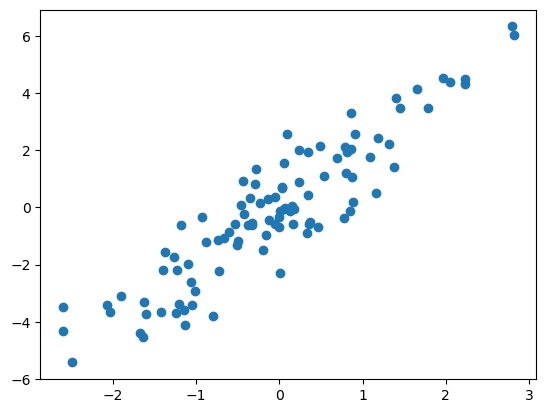

In [230]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1])
plt.show()

Let's use fancy indexing to select 20 random points. We'll do this by first choosing 20 random indices with no repeats, and using indices to select a portion of the original array:

In [231]:
indices = np.random.choice(x.shape[0], 20, replace = False)
indices

array([15, 96, 87, 93, 49, 54, 97, 83, 13, 82, 42, 86, 25, 65,  2, 29, 85,
       56, 17, 72])

In [232]:
selection = x[indices]
selection.shape

(20, 2)

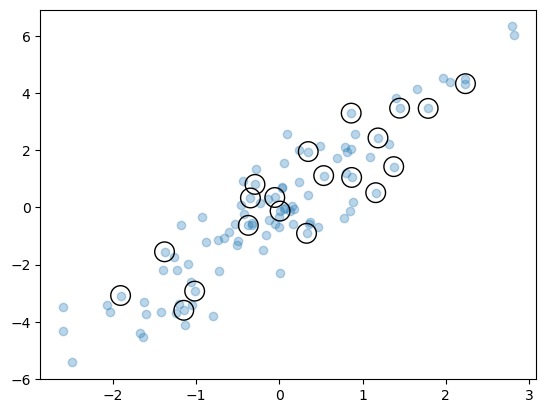

In [233]:
plt.scatter(x[:,0], x[:,1], alpha = 0.3)
plt.scatter(selection[:,0], selection[:,1],
            facecolor='none', edgecolors='black', s = 200)

## Modifying Values with Fancy Indexing

Just as fancy indexing can be used to access part of an array, it can aslo be used to modify parts of an array. For example, image we have an array of indices and we'd like to set the corresponding items in an array to some value:

In [234]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [235]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Notice, though, that repeated indices with these operations can cause soome potentiallu unexpected results. Consider the following:

In [236]:
x = np.zeros(10)
x[[0,0]] = [4,6]
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

where did the 4 go? This operation first assigns x[0] = 4, followed by x[0] = 6. The result, of course, is that x[0] contains the value 6.

In [237]:
i = [2,3,3,4,4,4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

You might expect that x[3] would contain the value 2 and x[4] would contain the value 3, as this is how many times each index is repeated. Why is this not the case? Conceptually, this is because x[i] += 1 is mean as a shorthand of x[i] = x[i]+1. x[i] + 1 is evaluated, and then the result is assigned to the indices in x. With this in mind, it is not the augmentation that happens multiple times, but the assignment, which leads to the rather nonintuitive results.
<br><br>
So what if you want the other behavior where the operation is replaced? For this you can use the at method of ufcs and do the following:

In [238]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


The method does an in-place application of the given operator at the specifed indices (here, i) with the specified value (here, 1). Another method that is similar tin sprit is the <b> reduceat</b> method of ufuncs, where you can read about in the NumPy documentation.

## Example Binning Data

You could use these ideas to efficently do custom binned computations on data. For example, imagine we have 100 values and would like to quickly find where they fall whithin an array of bins. We could compute this using ufuc.at like this:

In [240]:
rng = np.random.default_rng(seed = 1701)
x = rng.normal(size = 100)

#compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

#find the apropriate bin for each x
i = np.searchsorted(bins, x)

#add 1 to each of this bins
np.add.at(counts, i, 1)

The counts now reflect the number of point within each bin-in other words, a histogram:

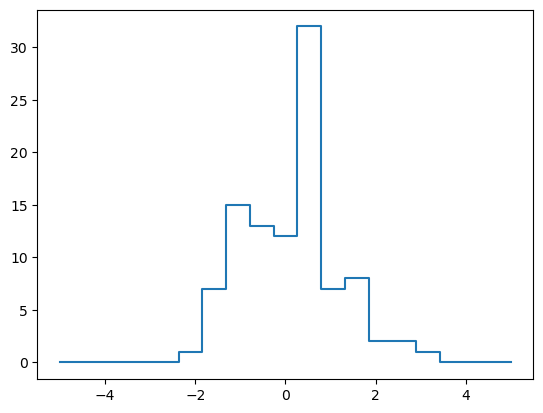

In [241]:
plt.plot(bins, counts, drawstyle='steps')

In [244]:
print(f"NumPy histogram ({len(x)} points):")
%timeit counts, edges = np.histogram(x, bins)

print(f"Custom histogram ({len(x)} points):")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy histogram (100 points):
7.5 μs ± 249 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Custom histogram (100 points):
8.22 μs ± 24.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# <b> PART 7: Sorting Arrays

Python has a couple of build-in functions and methods for sorting lists and other iterable objects. The sorted function accepts a list and returns a sorted version of it:

In [245]:
L = [3,1,4,1,5,9,2,6]
sorted(L)

[1, 1, 2, 3, 4, 5, 6, 9]

In [247]:
L.sort() #inplace = True
print(L)

[1, 1, 2, 3, 4, 5, 6, 9]


In [248]:
sorted('python')

['h', 'n', 'o', 'p', 't', 'y']

## Fast Sorting in NumPy: np.sort

In [249]:
import numpy as np

x = np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [250]:
x.sort()
print(x)

[1 2 3 4 5]


In [252]:
x = np.array([2,1,4,3,5])
i = np.argsort(x) # return sorted indices
print(i)

[1 0 3 2 4]


In [253]:
x[i]

array([1, 2, 3, 4, 5])

## Sorting Along Rows or Columns

In [ ]:
rng = np.random.default_rng(seed = 42)
x = rng.integers(0, 10, (4,6))
print(x)

[[0 7 6 4 4 8]
 [0 6 2 0 5 9]
 [7 7 7 7 5 1]
 [8 4 5 3 1 9]]


In [255]:
# sort each column of x
np.sort(x, axis = 0)

array([[0, 4, 2, 0, 1, 1],
       [0, 6, 5, 3, 4, 8],
       [7, 7, 6, 4, 5, 9],
       [8, 7, 7, 7, 5, 9]])

In [256]:
# sort each row of x
np.sort(x, axis = 1)

array([[0, 4, 4, 6, 7, 8],
       [0, 0, 2, 5, 6, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

## Partical Sorts: Partioning

In [259]:
x = np.array([7,2,3,1,6,5,4])
np.partition(x,3)

array([2, 1, 3, 4, 6, 5, 7])

In [279]:
x = rng.integers(0, 10, (4,6))
print(x, '\n')
print(np.partition(x,2, axis = 1))
np.partition(x,2,axis=0)

[[3 0 1 0 7 7]
 [6 4 7 1 9 5]
 [9 1 4 6 4 4]
 [1 3 2 3 6 6]] 

[[0 0 1 3 7 7]
 [1 4 5 6 9 7]
 [1 4 4 6 9 4]
 [1 2 3 3 6 6]]


array([[1, 0, 1, 0, 4, 4],
       [3, 1, 2, 1, 6, 5],
       [6, 3, 4, 3, 7, 6],
       [9, 4, 7, 6, 9, 7]])

## Example: K-Nearest Neighbour

Lets' quickly see how we might use the argsort funchtion along multiple axes to find the nearest neighbours of each point in a set. We'll start by creating a random set of points on a two-dimensional plane. using the standard convention, we'll arrange these a 10x2 array:

In [280]:
x = rng.random((10,2))
x

array([[0.36181261, 0.08764992],
       [0.1180059 , 0.96189766],
       [0.90858069, 0.69970713],
       [0.26586996, 0.96917638],
       [0.7787509 , 0.71689019],
       [0.4493615 , 0.27224156],
       [0.09639096, 0.9026024 ],
       [0.45577629, 0.20236336],
       [0.30595662, 0.57921957],
       [0.17677278, 0.85661428]])

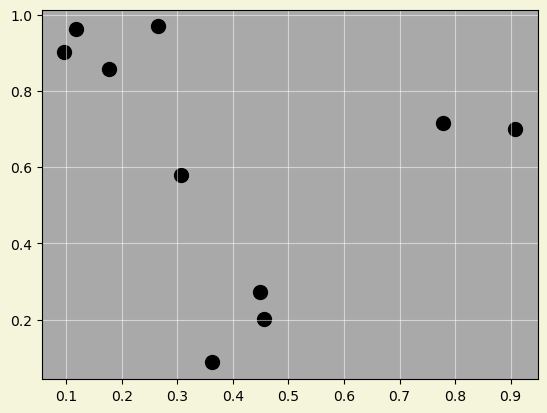

In [297]:
plt.rcParams['axes.facecolor'] = 'darkgray'
plt.rcParams['figure.facecolor'] = 'beige'
plt.scatter(x[:,0], x[:,1], s = 100, color = 'black')
plt.grid(True, alpha = .5, color='white')

Now we'll compute the distance between each pair of points. Recall that the squared distance between two points is the sum of the squared diffeerence in each dimensions; using the effective broadcasting and aggregation routes provided by NumPy we can compute the matrix of square distance in a single line of code:

In [298]:
dist_sq = np.sum((x[:, np.newaxis] - x[np.newaxis, :]) ** 2, axis = -1)

This operation has a lot packed into it, and it mignt be a bit confusing if you'are unfamiliar with NumPy's bradcasting rules. When you come across code like this, it can be usefull to break it doen into its componenent steps:

In [299]:
# for each pair of points, compute difference in their coordinates
differences = x[:, np.newaxis] - x[np.newaxis, :]
differences.shape

(10, 10, 2)

In [300]:
#square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [302]:
#sum the coordinate difference to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [303]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [304]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 7 5 8 4 9 2 6 3 1]
 [1 6 9 3 8 4 5 7 2 0]
 [2 4 8 5 7 3 9 0 1 6]
 [3 9 1 6 8 4 2 5 7 0]
 [4 2 8 5 3 7 9 1 6 0]
 [5 7 0 8 4 2 9 3 6 1]
 [6 1 9 3 8 4 5 7 2 0]
 [7 5 0 8 4 2 9 6 3 1]
 [8 9 5 6 3 7 1 4 0 2]
 [9 6 1 3 8 4 5 7 2 0]]


In [305]:
k = 2
nearest_partision = np.argpartition(dist_sq, k + 1, axis = 1)

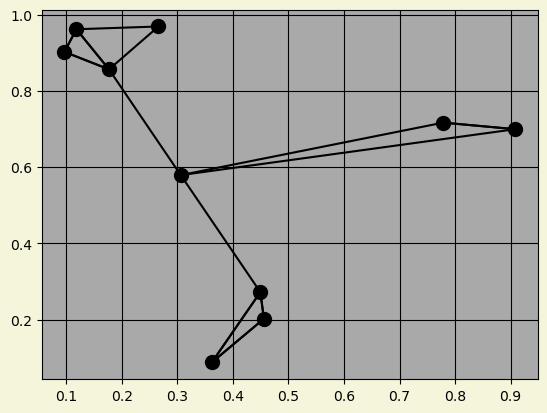

In [318]:
plt.scatter(x[:, 0], x[:, 1], s=100, color = 'black')
plt.grid(True, color = 'black')

#draw lines form eatch point to its two nearest neighbars
k = 2
for i in range(x.shape[0]):
    for j in nearest_partision[i, :k+1]:
        # plot a line from x[i] to x[j]
        # use same zip magic to make it hapen:
        plt.plot(*zip(x[i], x[j]), color = 'black')

# <b> PART 8: Structured Data: NumPy's Structured Arrays

In [319]:
import numpy as np

In [320]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 54, 17, 17]
weight = [55.0, 85.5, 68.0, 61.5]

In [321]:
x = np.zeros(4, dtype = int)

In [325]:
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10','i4', 'f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


here 
<br>U10 -> translate to Unicode string of maximum lenght of 10, 
<br>i4 -> 4bytes int 32bit, 
<br>f8 -> 8byte float(64-bit).

In [326]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 54, 85.5) ('Cathy', 17, 68. )
 ('Doug', 17, 61.5)]


In [327]:
#Get all names
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [328]:
#get first row of data
data[0]

('Alice', 25, 55.)

In [330]:
#get the name from the last row
data[-1]['name']

'Doug'

In [331]:
#get names where age is under 30
data[data['age']<30]['name']

array(['Alice', 'Cathy', 'Doug'], dtype='<U10')

## Exploring Structured Array Creating

In [333]:
np.dtype({'names': ('name', 'age', 'weight'),
          'formats':((np.str_,10), int, np.float32)})

dtype([('name', '<U10'), ('age', '<i8'), ('weight', '<f4')])

In [334]:
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

In [335]:
np.dtype('S10,i4,f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

<h3><em>Table: NumPy data types</em></h3>

<style>
  table.numpy-dtypes {
    border-collapse: collapse;
    font-family: monospace;
    background-color: #1e1e1e;
    color: white;
    width: 100%;
    margin-bottom: 20px;
  }
  table.numpy-dtypes th, table.numpy-dtypes td {
    border: 1px solid #444;
    padding: 8px 12px;
    text-align: left;
  }
  table.numpy-dtypes th {
    background-color: #000;
  }
</style>

<table class="numpy-dtypes">
  <thead>
    <tr>
      <th>Character</th>
      <th>Description</th>
      <th>Example</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>'b'</td>
      <td>Byte</td>
      <td>np.dtype('b')</td>
    </tr>
    <tr>
      <td>'i'</td>
      <td>Signed integer</td>
      <td>np.dtype('i4') == np.int32</td>
    </tr>
    <tr>
      <td>'u'</td>
      <td>Unsigned integer</td>
      <td>np.dtype('u1') == np.uint8</td>
    </tr>
    <tr>
      <td>'f'</td>
      <td>Floating point</td>
      <td>np.dtype('f8') == np.float64</td>
    </tr>
    <tr>
      <td>'c'</td>
      <td>Complex floating point</td>
      <td>np.dtype('c16') == np.complex128</td>
    </tr>
    <tr>
      <td>'S', 'a'</td>
      <td>String</td>
      <td>np.dtype('S5')</td>
    </tr>
    <tr>
      <td>'U'</td>
      <td>Unicode string</td>
      <td>np.dtype('U') == np.str_</td>
    </tr>
    <tr>
      <td>'V'</td>
      <td>Raw data (void)</td>
      <td>np.dtype('V') == np.void</td>
    </tr>
  </tbody>
</table>


## More Advanced Compound Types

In [336]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])

(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


## Record Arrays: Structured Arrays with a Twist

In [337]:
data['age']

array([25, 54, 17, 17], dtype=int32)

In [338]:
data_rec = data.view(np.recarray)
data_rec.age

array([25, 54, 17, 17], dtype=int32)

In [339]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

44.2 ns ± 1.14 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
629 ns ± 19.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.18 μs ± 8.85 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
